In [20]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pprint  # To tidy up
from bs4 import BeautifulSoup
import pandas as pd
import time

In [21]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run Chrome in headless mode
options.add_argument("--no-sandbox") 
driver = webdriver.Chrome(options=options)

url = "https://www.bbc.com/weather/293397"
driver.get(url)

time.sleep(5)

soup = BeautifulSoup(driver.page_source, 'html.parser')

In [22]:
print(soup.prettify()[:400])

<html class="b-reith-sans-font b-pw-1280 no-touch wr-enhanced wr-svg id-svg b-reith-sans-loaded bbcdotcom" data-location-id="293397" data-location-name="Tel%20Aviv" data-wr-unit--temperature="c" data-wr-unit--windspeed="mph" id="weather-forecast" lang="en">
 <head>
  <meta content="width=device-width, initial-scale=1, user-scalable=1" name="viewport"/>
  <meta charset="utf-8"/>
  <meta content="IE


In [63]:
date = [item.get_text() for item in soup.find_all(class_='wr-day__title wr-js-day-content-title')]
print(date)
weather_type = [item.get_text() for item in soup.find_all(class_='wr-weather-type__text')][:len(date)]
print(weather_type)
max_temp = [item.get_text() for item in soup.find_all(class_='wr-day-temperature__high-value')][:len(date)]
print(max_temp)
min_temp = [item.get_text() for item in soup.find_all(class_='wr-day-temperature__low-value')][:len(date)]
print(min_temp)
wind_speed = [item.get_text() for item in soup.find_all(class_='wr-day__wind-speed')][:len(date)]
print(wind_speed)


['Tonight', 'Tuesday\xa09th\xa0JanuaryTue\xa09th', 'Wednesday\xa010th\xa0JanuaryWed\xa010th', 'Thursday\xa011th\xa0JanuaryThu\xa011th', 'Friday\xa012th\xa0JanuaryFri\xa012th', 'Saturday\xa013th\xa0JanuarySat\xa013th', 'Sunday\xa014th\xa0JanuarySun\xa014th', 'Monday\xa015th\xa0JanuaryMon\xa015th', 'Tuesday\xa016th\xa0JanuaryTue\xa016th', 'Wednesday\xa017th\xa0JanuaryWed\xa017th', 'Thursday\xa018th\xa0JanuaryThu\xa018th', 'Friday\xa019th\xa0JanuaryFri\xa019th', 'Saturday\xa020th\xa0JanuarySat\xa020th', 'Sunday\xa021st\xa0JanuarySun\xa021st']
['Clear Sky', 'Sunny', 'Thundery Showers', 'Light Rain Showers', 'Light Rain Showers', 'Sunny', 'Light Rain Showers', 'Light Rain Showers', 'Sunny', 'Light Rain Showers', 'Sunny', 'Sunny', 'Sunny', 'Light Rain Showers']
['21° 70°', '19° 67°', '18° 64°', '18° 65°', '20° 67°', '18° 65°', '16° 61°', '18° 64°', '19° 66°', '20° 68°', '20° 67°', '20° 68°', '20° 68°']
['10° 50°', '11° 51°', '14° 57°', '14° 57°', '11° 52°', '12° 53°', '13° 55°', '10° 50°', '

In [67]:
if len(max_temp) < len(date):
    max_temp.append('N/A')

In [91]:
print(len(date))
print(len(weather_type))
print(len(max_temp))
print(len(min_temp))
print(len(wind_speed))

14
14
14
14
14


In [124]:
driver.quit()

In [125]:
weather_data = {
    'Date': date,
    'Weather Type': weather_type,
    'Max Temperature': max_temp,
    'Min Temperature': min_temp,
    'Wind Speed': wind_speed
}

df = pd.DataFrame(weather_data)
print(df)

                              Date        Weather Type Max Temperature  \
0                          Tonight           Clear Sky         21° 70°   
1       Tuesday 9th JanuaryTue 9th               Sunny         19° 67°   
2   Wednesday 10th JanuaryWed 10th    Thundery Showers         18° 64°   
3    Thursday 11th JanuaryThu 11th  Light Rain Showers         18° 65°   
4      Friday 12th JanuaryFri 12th  Light Rain Showers         20° 67°   
5    Saturday 13th JanuarySat 13th               Sunny         18° 65°   
6      Sunday 14th JanuarySun 14th  Light Rain Showers         16° 61°   
7      Monday 15th JanuaryMon 15th  Light Rain Showers         18° 64°   
8     Tuesday 16th JanuaryTue 16th               Sunny         19° 66°   
9   Wednesday 17th JanuaryWed 17th  Light Rain Showers         20° 68°   
10   Thursday 18th JanuaryThu 18th               Sunny         20° 67°   
11     Friday 19th JanuaryFri 19th               Sunny         20° 68°   
12   Saturday 20th JanuarySat 20th    

In [126]:
df.dtypes

Date               object
Weather Type       object
Max Temperature    object
Min Temperature    object
Wind Speed         object
dtype: object

In [127]:
def convert_date(date_string):
    try:
        # Split the string by spaces and remove 'th' or 'rd' from the day
        parts = date_string.split()
        day = parts[0][:3]
        month = parts[2][:3]
        numeric_day = parts[1][:-2]

        # Dictionary mapping abbreviated month to full month name
        month_mapping = {
            'Jan': 'January',
            'Feb': 'February',
            'Mar': 'March',
            'Apr': 'April',
            'May': 'May',
            'Jun': 'June',
            'Jul': 'July',
            'Aug': 'August',
            'Sep': 'September',
            'Oct': 'October',
            'Nov': 'November',
            'Dec': 'December'
        }

        # Get the full month name from the mapping
        full_month = month_mapping.get(month)

        return f"{day}, {full_month}, {numeric_day}"
    except IndexError:
        return None  # Return None for rows with unexpected formats

# Apply the function to the 'Date' column
df['Date'] = df['Date'].apply(convert_date)
print(df)

                Date        Weather Type Max Temperature Min Temperature  \
0               None           Clear Sky         21° 70°         10° 50°   
1    Tue, January, 9               Sunny         19° 67°         11° 51°   
2   Wed, January, 10    Thundery Showers         18° 64°         14° 57°   
3   Thu, January, 11  Light Rain Showers         18° 65°         14° 57°   
4   Fri, January, 12  Light Rain Showers         20° 67°         11° 52°   
5   Sat, January, 13               Sunny         18° 65°         12° 53°   
6   Sun, January, 14  Light Rain Showers         16° 61°         13° 55°   
7   Mon, January, 15  Light Rain Showers         18° 64°         10° 50°   
8   Tue, January, 16               Sunny         19° 66°          9° 48°   
9   Wed, January, 17  Light Rain Showers         20° 68°         11° 51°   
10  Thu, January, 18               Sunny         20° 67°         10° 50°   
11  Fri, January, 19               Sunny         20° 68°         10° 51°   
12  Sat, Jan

In [137]:
df.at[0, 'Date'] = 'Mon, January, 8' if pd.isnull(df.at[0, 'Date']) else df.at[0, 'Date']


In [138]:
print(df)

                Date        Weather Type Max Temperature Min Temperature  \
0    Mon, January, 8           Clear Sky         21° 70°         10° 50°   
1    Tue, January, 9               Sunny         19° 67°         11° 51°   
2   Wed, January, 10    Thundery Showers         18° 64°         14° 57°   
3   Thu, January, 11  Light Rain Showers         18° 65°         14° 57°   
4   Fri, January, 12  Light Rain Showers         20° 67°         11° 52°   
5   Sat, January, 13               Sunny         18° 65°         12° 53°   
6   Sun, January, 14  Light Rain Showers         16° 61°         13° 55°   
7   Mon, January, 15  Light Rain Showers         18° 64°         10° 50°   
8   Tue, January, 16               Sunny         19° 66°          9° 48°   
9   Wed, January, 17  Light Rain Showers         20° 68°         11° 51°   
10  Thu, January, 18               Sunny         20° 67°         10° 50°   
11  Fri, January, 19               Sunny         20° 68°         10° 51°   
12  Sat, Jan

In [139]:
#Split temperatures to Celsius and Fahrenheit
def split_temperature(temperature_string):
    try:
        parts = temperature_string.split()
        celsius = int(parts[0][:-1])  # Extract Celsius value (remove the degree symbol)
        fahrenheit = int(parts[1][:-1])  # Extract Fahrenheit value (remove the degree symbol)
        return celsius, fahrenheit
    except (ValueError, IndexError):
        return None, None 

df['Max Celsius'], df['Max Fahrenheit'] = zip(*df['Max Temperature'].apply(split_temperature))
df['Min Celsius'], df['Min Fahrenheit'] = zip(*df['Min Temperature'].apply(split_temperature))

In [140]:
#In column Wind speed extract only numbers:
import re

def extract_numbers(text):
    num = re.search(r'\bmph(\d+)\b', text)
    return int(num.group(1)) if num else None
df['Wind Speed (in mph)'] = df['Wind Speed'].apply(extract_numbers)

In [141]:
df.head()

,Date,Weather Type,Max Temperature,Min Temperature,Wind Speed,Max Celsius,Max Fahrenheit,Min Celsius,Min Fahrenheit,Wind Speed (in mph)
0,"Mon, January, 8",Clear Sky,21° 70°,10° 50°,Wind speed5 mph8 km/h SE5 mph8 km/hSouth Easterly,21.0,70.0,10,50,8
1,"Tue, January, 9",Sunny,19° 67°,11° 51°,Wind speed13 mph21 km/h SW13 mph21 km/hSouth W...,19.0,67.0,11,51,21
2,"Wed, January, 10",Thundery Showers,18° 64°,14° 57°,Wind speed18 mph29 km/h SW18 mph29 km/hSouth W...,18.0,64.0,14,57,29
3,"Thu, January, 11",Light Rain Showers,18° 65°,14° 57°,Wind speed14 mph22 km/h W14 mph22 km/hWesterly,18.0,65.0,14,57,22
4,"Fri, January, 12",Light Rain Showers,20° 67°,11° 52°,Wind speed15 mph24 km/h SW15 mph24 km/hSouth W...,20.0,67.0,11,52,24


In [142]:
df.describe()

,Max Celsius,Max Fahrenheit,Min Celsius,Min Fahrenheit,Wind Speed (in mph)
count,13.000000,13.000000,14.000000,14.000000,14.000000
mean,19.000000,66.153846,11.142857,51.928571,18.142857
std,1.354006,2.339735,1.561909,2.673640,8.122686
min,16.000000,61.000000,9.000000,48.000000,8.000000
25%,18.000000,65.000000,10.000000,50.250000,11.250000
50%,19.000000,67.000000,11.000000,51.000000,18.500000
75%,20.000000,68.000000,11.750000,52.750000,23.500000
max,21.000000,70.000000,14.000000,57.000000,33.000000


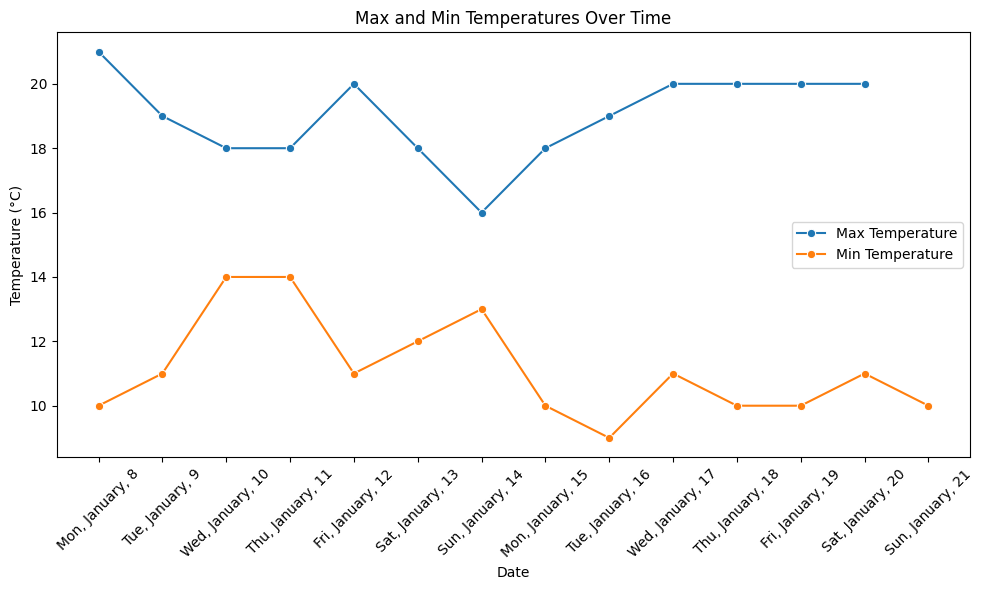

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Max Celsius', data=df, marker='o', label='Max Temperature')
sns.lineplot(x='Date', y='Min Celsius', data=df, marker='o', label='Min Temperature')


plt.title('Max and Min Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')


plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Let's check how wind speed depends on minimal temperature

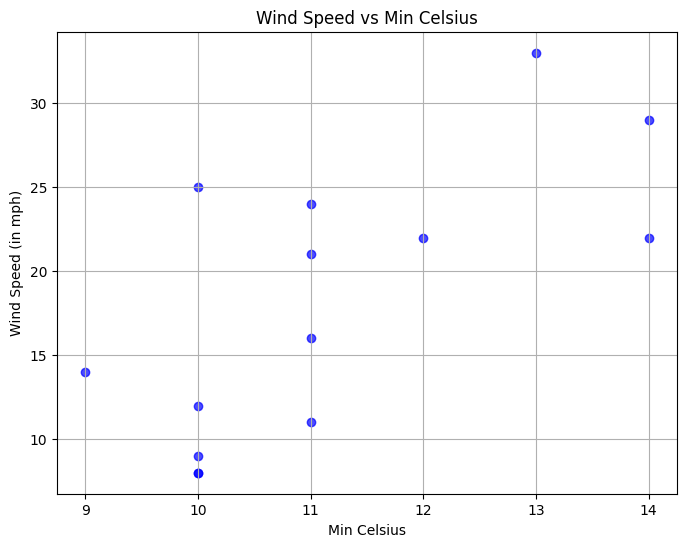

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Min Celsius'], df['Wind Speed (in mph)'], color='blue', alpha=0.7)

plt.title('Wind Speed vs Min Celsius')
plt.xlabel('Min Celsius')
plt.ylabel('Wind Speed (in mph)')

plt.grid(True)
plt.show()